
# importing libraries & dataset

In [1]:
!pip install category_encoders

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import category_encoders as ce

In [4]:
df = pd.read_csv("/kaggle/input/real-estate-goldmine/dubai_properties.csv")


# printing information about df

In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 73023 entries, 0 to 73738
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rent                    73023 non-null  int64  
 1   Beds                    73023 non-null  int64  
 2   Baths                   73023 non-null  int64  
 3   Area_in_sqft            73023 non-null  int64  
 4   Rent_per_sqft           73023 non-null  float64
 5   Rent_category           73023 non-null  int64  
 6   Frequency               73023 non-null  int64  
 7   Furnishing              73023 non-null  int64  
 8   Purpose                 73023 non-null  int64  
 9   Posted_date             73022 non-null  float64
 10  Age_of_listing_in_days  73023 non-null  int64  
 11  Latitude                73023 non-null  float64
 12  Longitude               73023 non-null  float64
 13  Address                 73023 non-null  float64
 14  Type                    73023 non-null  flo

In [34]:
print(df.isna().sum())

Rent                      0
Beds                      0
Baths                     0
Area_in_sqft              0
Rent_per_sqft             0
Rent_category             0
Frequency                 0
Furnishing                0
Purpose                   0
Posted_date               1
Age_of_listing_in_days    0
Latitude                  0
Longitude                 0
Address                   0
Type                      0
Location                  0
City                      0
dtype: int64


In [35]:
print(df.duplicated().sum())

5


# columns relationships

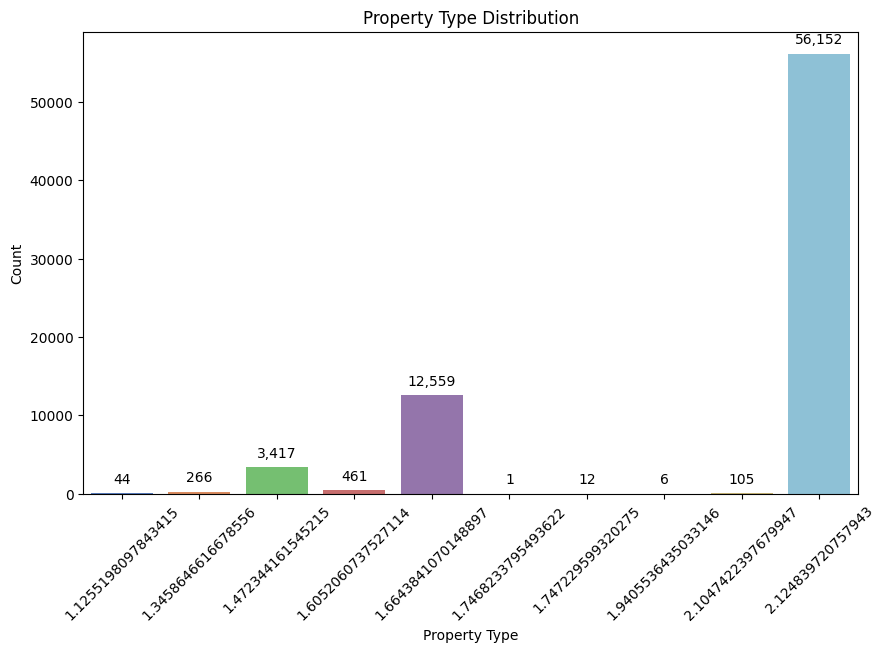

In [36]:
# Property Type Distribution
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Type', data=df, palette='muted')

for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Property Type Distribution')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

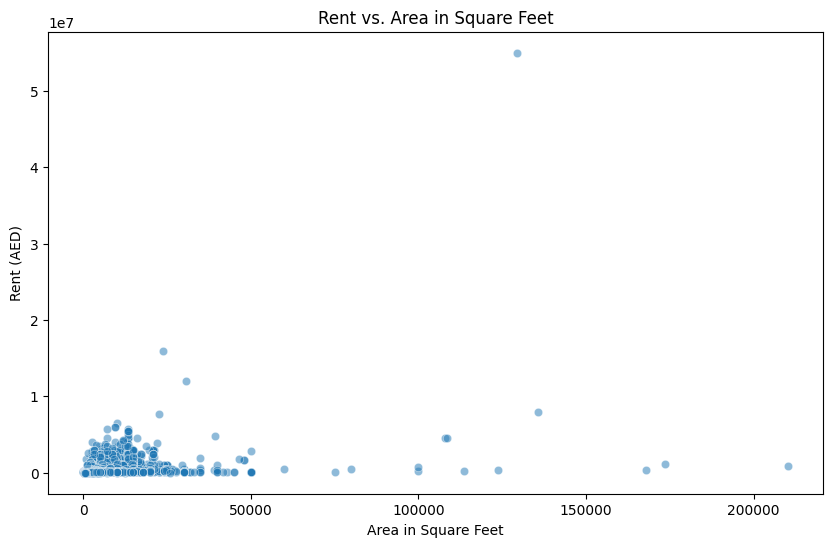

In [37]:
# Relationship between Rent and Area in Square Feet
plt.figure(figsize=(10,6))
sns.scatterplot(x='Area_in_sqft', y='Rent', data=df, alpha=0.5)
plt.title('Rent vs. Area in Square Feet')
plt.xlabel('Area in Square Feet')
plt.ylabel('Rent (AED)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



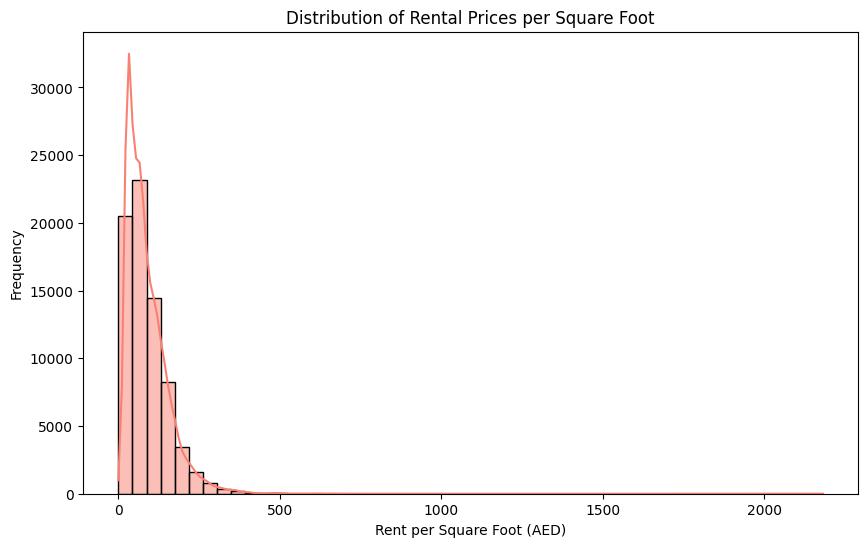

In [38]:
# Distribution of Rental Prices per Square Foot
plt.figure(figsize=(10,6))
sns.histplot(df['Rent_per_sqft'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Rental Prices per Square Foot')
plt.xlabel('Rent per Square Foot (AED)')
plt.ylabel('Frequency')
plt.show()

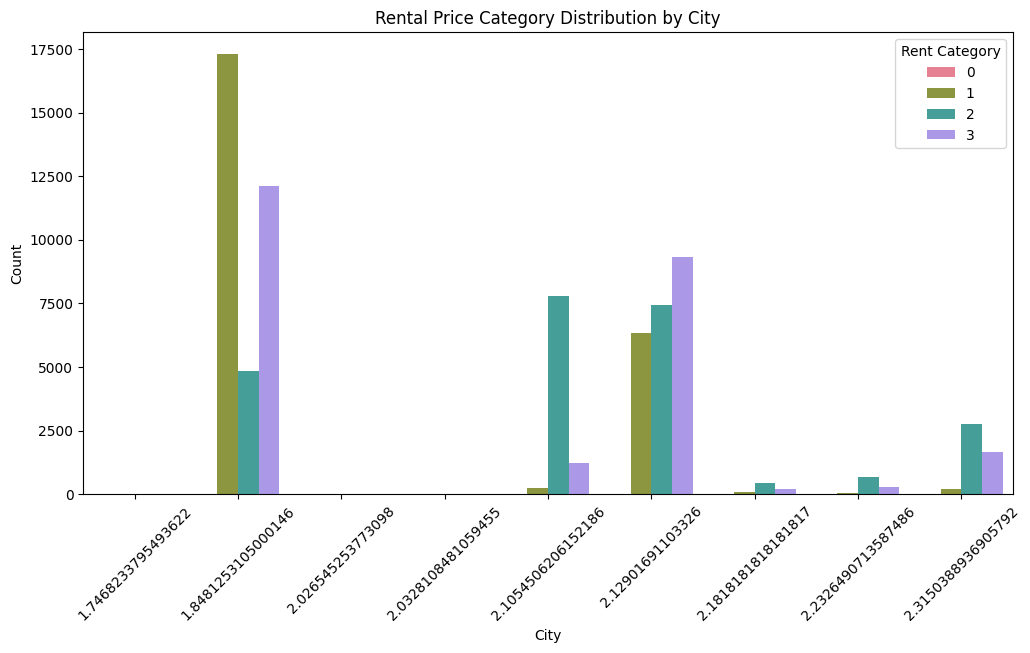

In [39]:
# Rental Price Category Distribution by City
plt.figure(figsize=(12,6))
sns.countplot(x='City', hue='Rent_category', data=df, palette='husl')
plt.title('Rental Price Category Distribution by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Rent Category')
plt.xticks(rotation=45)
plt.show()

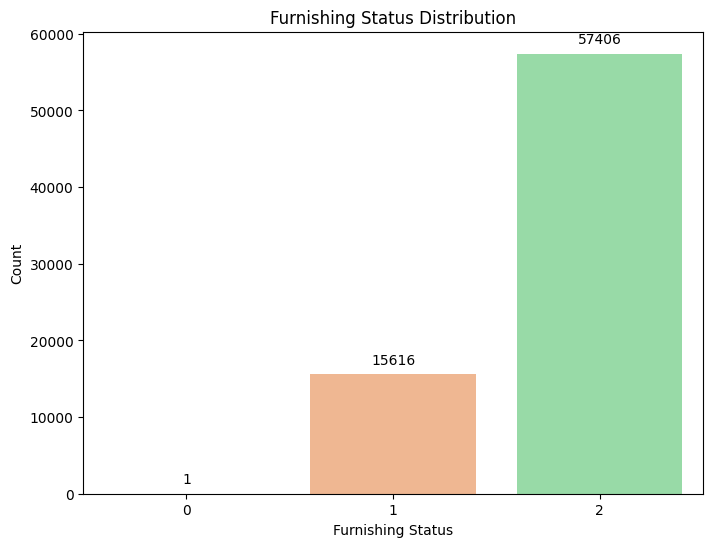

In [40]:
# Furnishing Status Distribution
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Furnishing', data=df, palette='pastel')
plt.title('Furnishing Status Distribution')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



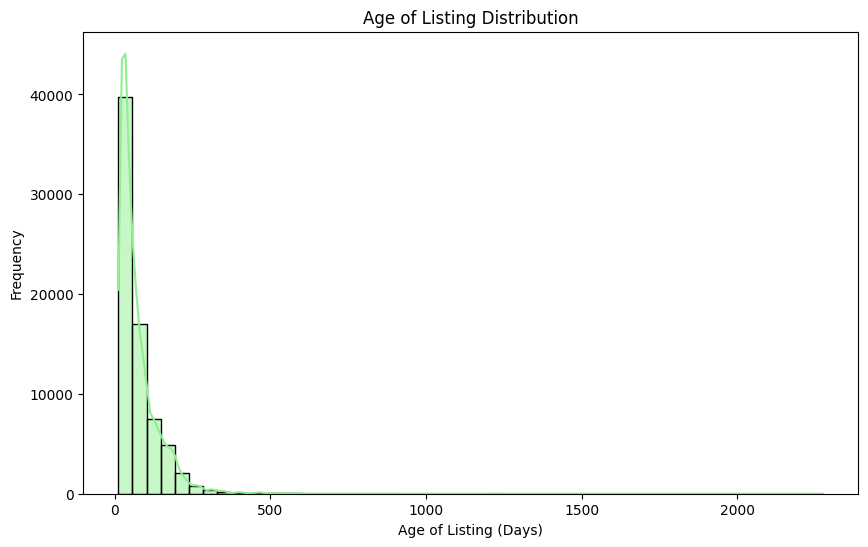

In [41]:
# Age of Listing Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Age_of_listing_in_days'], bins=50, kde=True, color='lightgreen')
plt.title('Age of Listing Distribution')
plt.xlabel('Age of Listing (Days)')
plt.ylabel('Frequency')
plt.show()

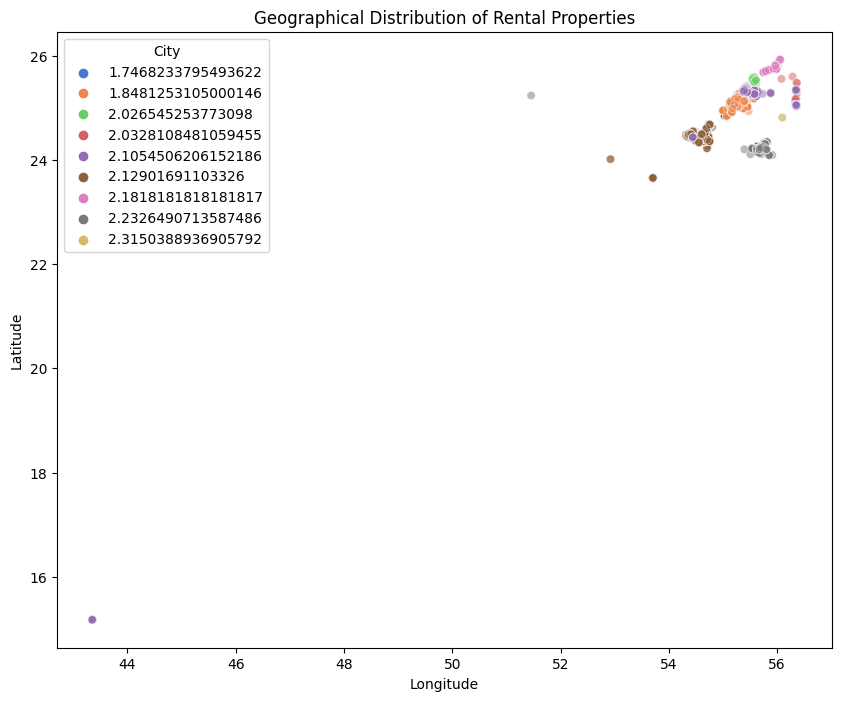

In [42]:
# Geographical Distribution of Rental Properties
plt.figure(figsize=(10,8))
sns.scatterplot(x='Longitude', y='Latitude', hue='City', data=df, palette='muted', alpha=0.5)
plt.title('Geographical Distribution of Rental Properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='City')
plt.show()

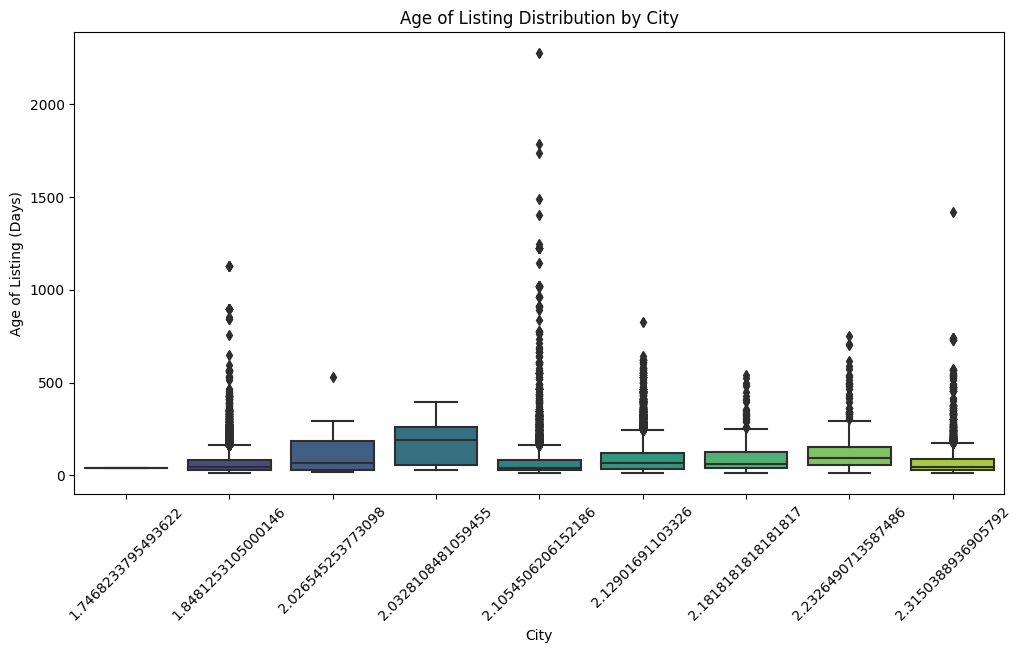

In [43]:
# Age of Listing Distribution by City
plt.figure(figsize=(12,6))
sns.boxplot(x='City', y='Age_of_listing_in_days', data=df, palette='viridis')
plt.title('Age of Listing Distribution by City')
plt.xlabel('City')
plt.ylabel('Age of Listing (Days)')
plt.xticks(rotation=45)
plt.show()

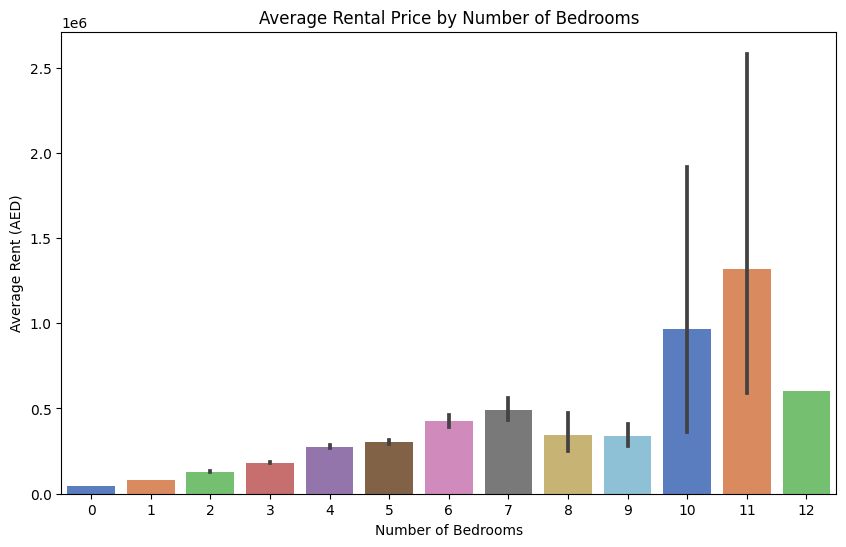

In [44]:
# Average Rental Price by Number of Bedrooms
plt.figure(figsize=(10,6))
sns.barplot(x='Beds', y='Rent', data=df, palette='muted')
plt.title('Average Rental Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Rent (AED)')
plt.show()


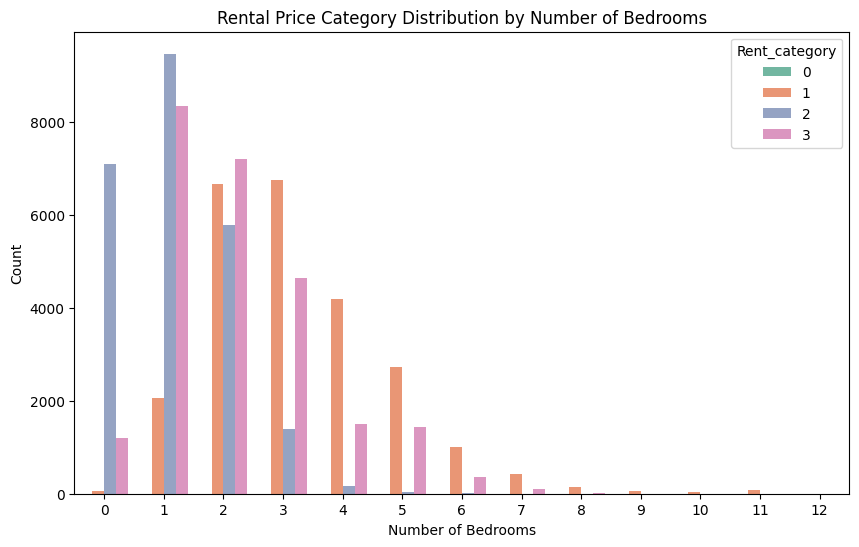

In [45]:
# Rental Price Category Distribution by Number of Bedrooms
plt.figure(figsize=(10,6))
sns.countplot(x='Beds', hue='Rent_category', data=df, palette='Set2')
plt.title('Rental Price Category Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

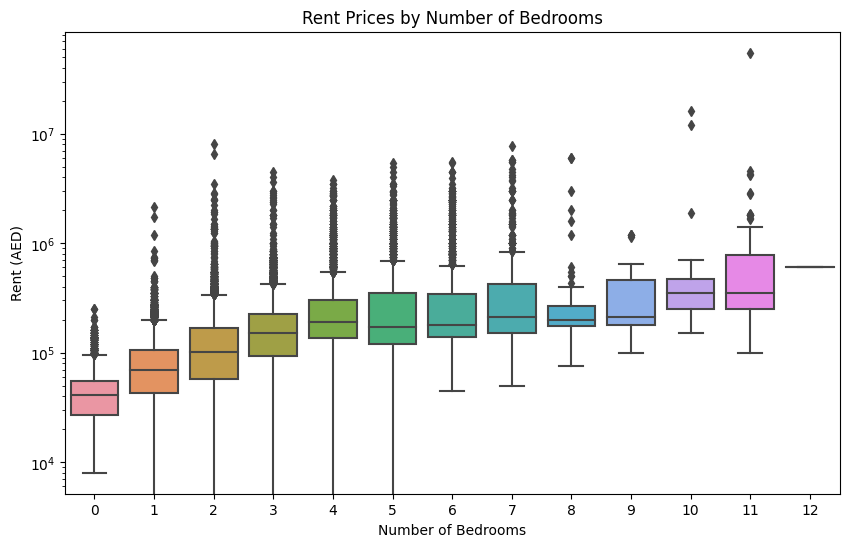

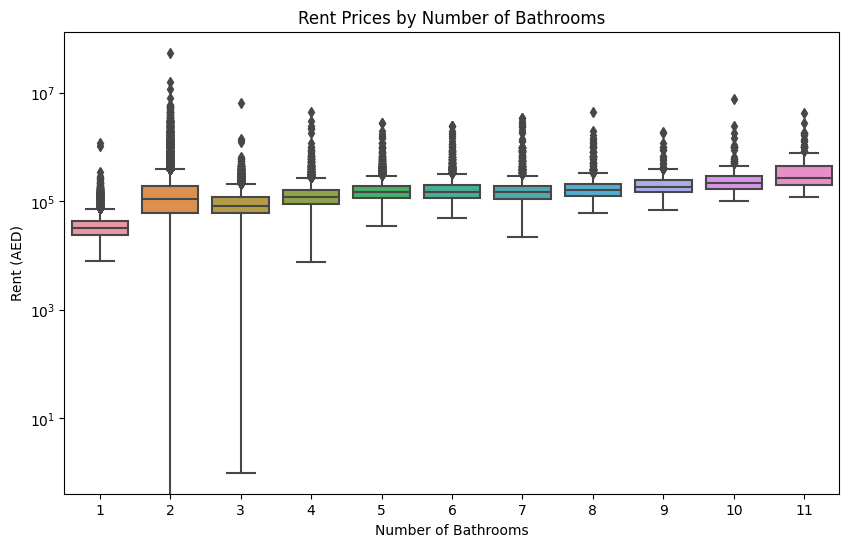

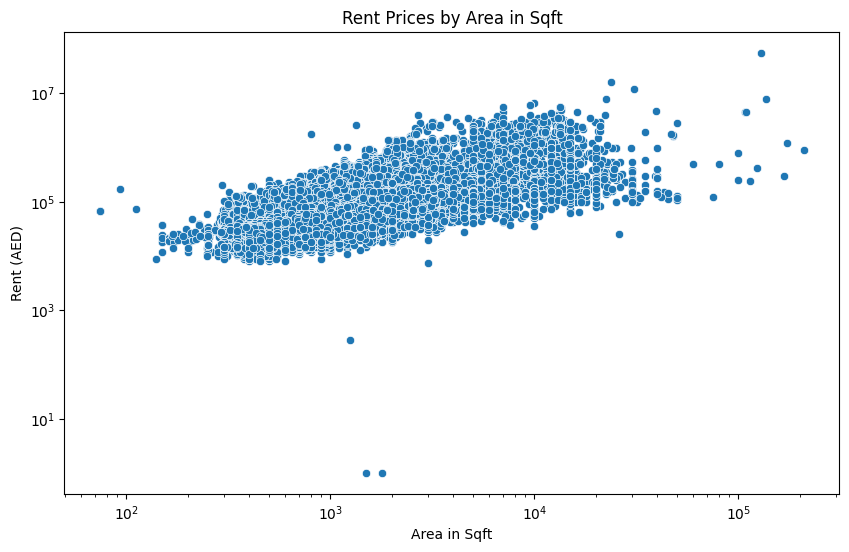

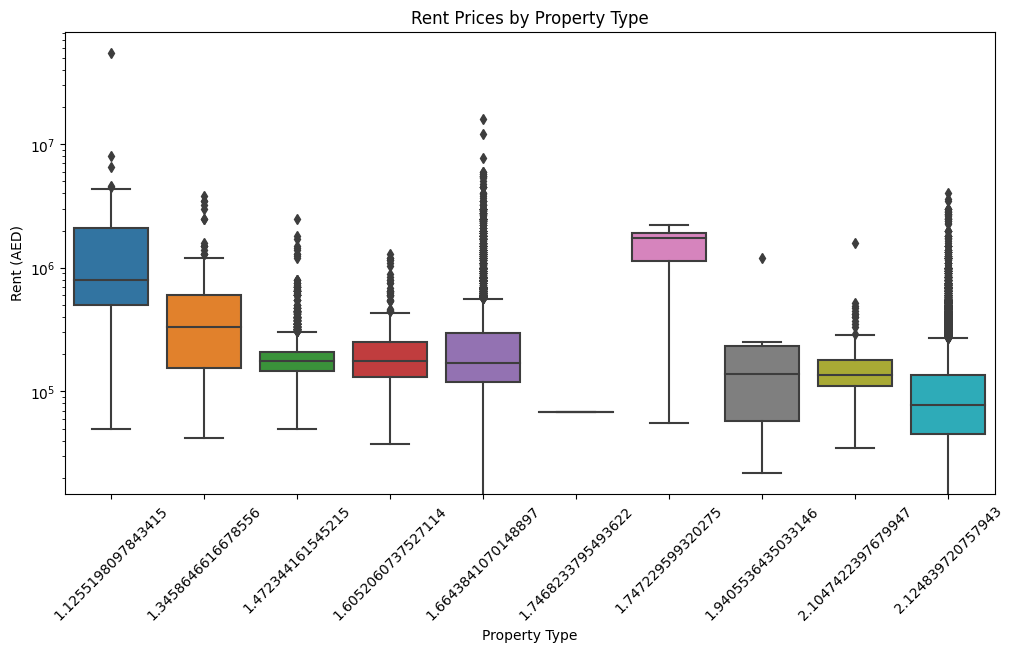

In [46]:
# Analyzing the relationship between rent and number of bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='Beds', y='Rent', data=df)
plt.title('Rent Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.show()

# Analyzing the relationship between rent and number of bathrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='Baths', y='Rent', data=df)
plt.title('Rent Prices by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.show()

# Analyzing the relationship between rent and area in sqft
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area_in_sqft', y='Rent', data=df)
plt.title('Rent Prices by Area in Sqft')
plt.xlabel('Area in Sqft')
plt.ylabel('Rent (AED)')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Analyzing the relationship between rent and property type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Rent', data=df)
plt.title('Rent Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

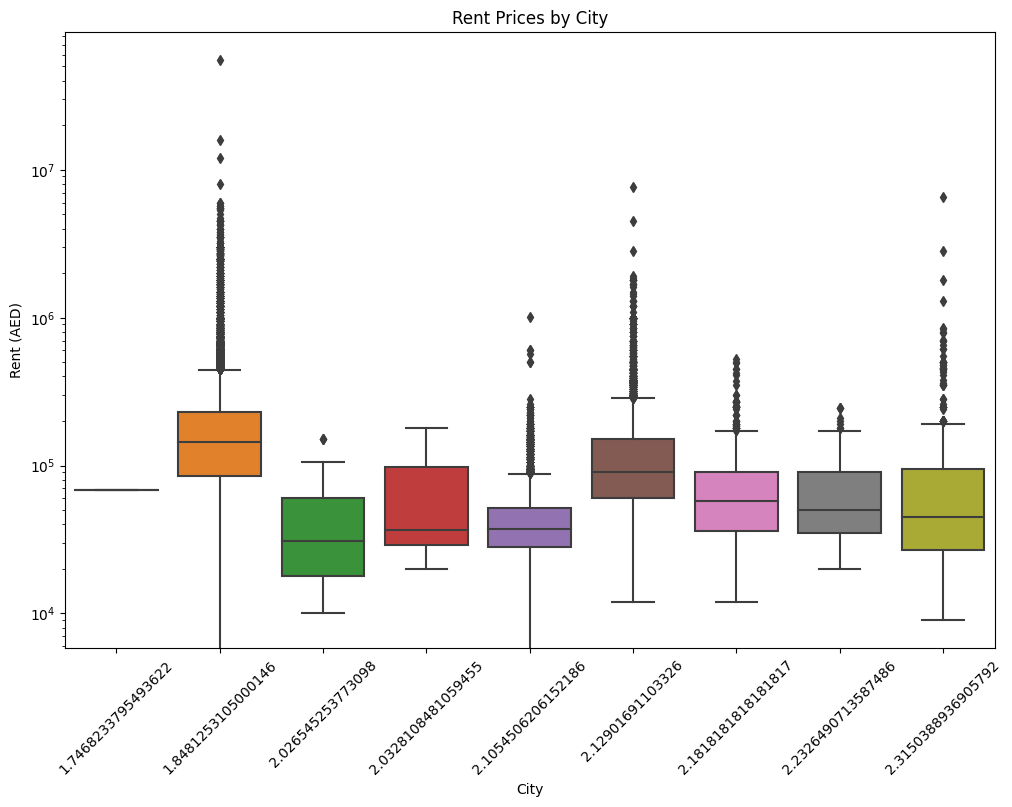

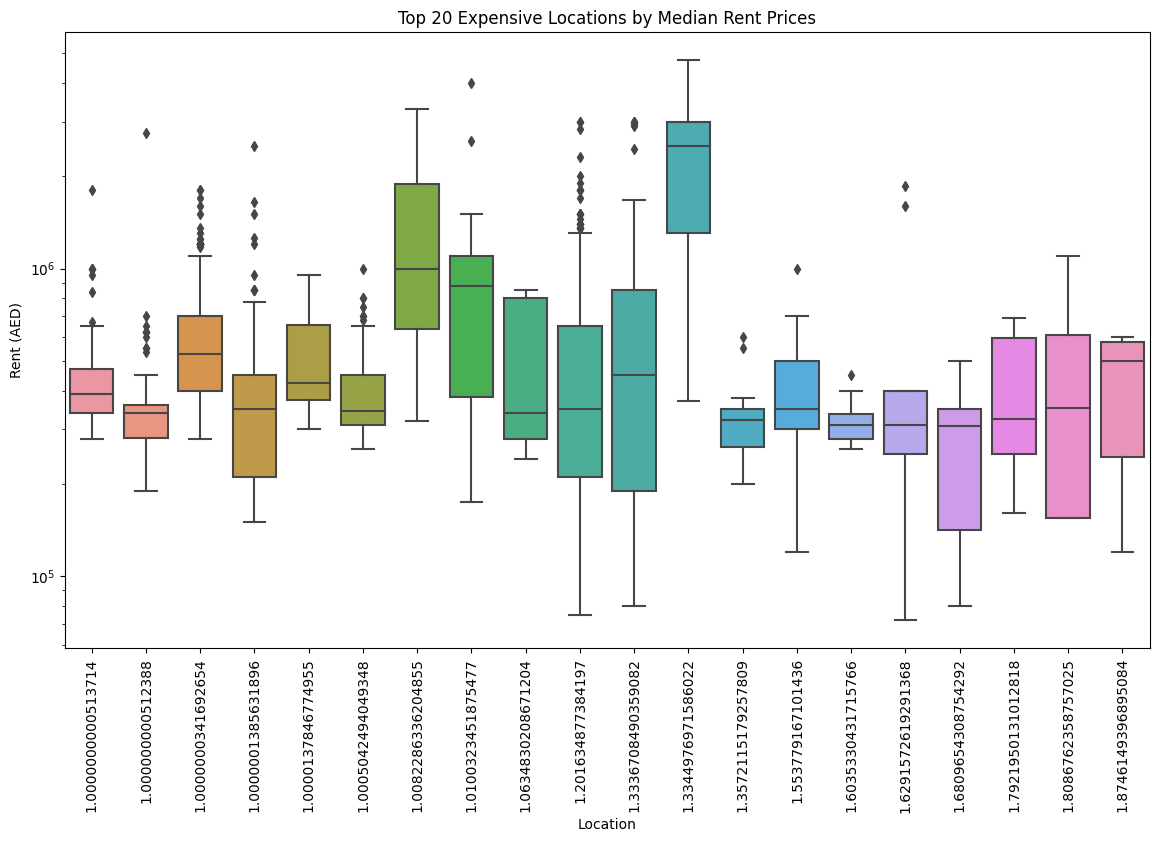

In [47]:
# Analyzing how rent varies across different cities
plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='Rent', data=df)
plt.title('Rent Prices by City')
plt.xlabel('City')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

# Analyzing how rent varies across different locations within cities
# Due to potentially large number of locations, we display only the top 20 locations by median rent
top_locations = df.groupby('Location')['Rent'].median().sort_values(ascending=False).head(20).index
filtered_data = df[df['Location'].isin(top_locations)]
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Rent', data=filtered_data)
plt.title('Top 20 Expensive Locations by Median Rent Prices')
plt.xlabel('Location')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

Least Expensive Areas for Renting (Top 10):
Location
2.006072    15000.0
2.000384    16999.5
2.000089    19000.0
2.000030    20000.0
2.003056    20000.0
2.000036    20000.0
2.029047    21000.0
2.059705    23500.0
2.078084    24500.0
2.000807    24600.0
Name: Rent, dtype: float64

Most Expensive Areas for Renting (Top 10):
Location
1.201635     350000.0
1.808676     352500.0
1.000000     390000.0
1.000014     425000.0
1.333671     450000.0
1.874615     500000.0
1.000000     527500.0
1.010032     875000.0
1.008229    1000000.0
1.334498    2499000.0
Name: Rent, dtype: float64


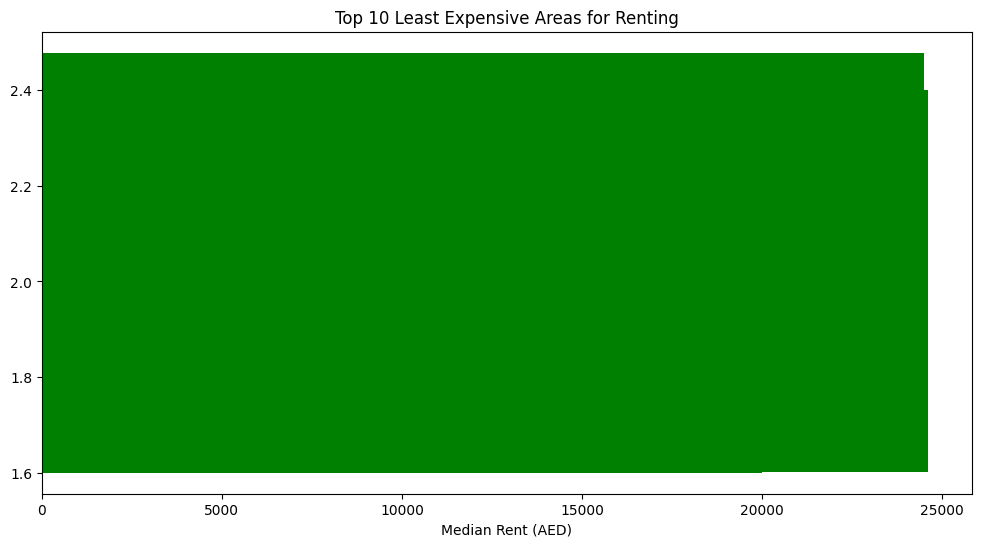

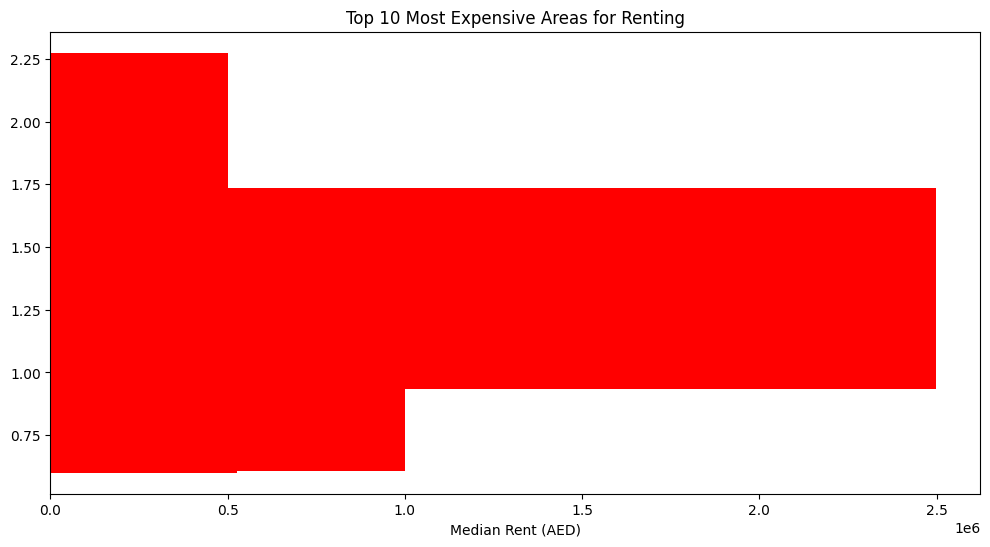

In [48]:
# Identify the most expensive and least expensive areas for renting
# Calculate median rent for each location and sort them
location_rent_stats = df.groupby('Location')['Rent'].median().sort_values()

# Display the least expensive areas
print("Least Expensive Areas for Renting (Top 10):")
print(location_rent_stats.head(10))

# Display the most expensive areas
print("\nMost Expensive Areas for Renting (Top 10):")
print(location_rent_stats.tail(10))

# Least expensive areas
plt.figure(figsize=(12, 6))
least_expensive = location_rent_stats.head(10)
plt.barh(least_expensive.index, least_expensive.values, color='green')
plt.xlabel('Median Rent (AED)')
plt.title('Top 10 Least Expensive Areas for Renting')
plt.show()

# Most expensive areas
plt.figure(figsize=(12, 6))
most_expensive = location_rent_stats.tail(10)
plt.barh(most_expensive.index, most_expensive.values, color='red')
plt.xlabel('Median Rent (AED)')
plt.title('Top 10 Most Expensive Areas for Renting')
plt.show()

In [49]:
fig = go.Figure()

fig.add_trace(go.Scattergeo(
        lon = df['Longitude'],
        lat = df['Latitude'],
        mode = 'markers',
        marker=dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues'
        )
        ))

fig.update_layout(
        title = 'Geo Spatial View',
        geo=dict(
        scope='asia',  # Set the geographic scope
        showland=True,
        landcolor = "rgb(250, 250, 250)",
        subunitcolor = "rgb(217, 217, 217)",
        countrywidth = 0.5,
        subunitwidth = 0.5,
        showcountries=True,
        countrycolor='darkgray',
        showocean=True,
        oceancolor='lightblue',
        showlakes=True,
        lakecolor='lightblue',
        showrivers=True,
        rivercolor='lightblue',
        showcoastlines=True,
        coastlinecolor='darkblue',
        projection_type='natural earth',
        center=dict(lon=55.2708, lat=25.2048)
    )
)

fig.show()

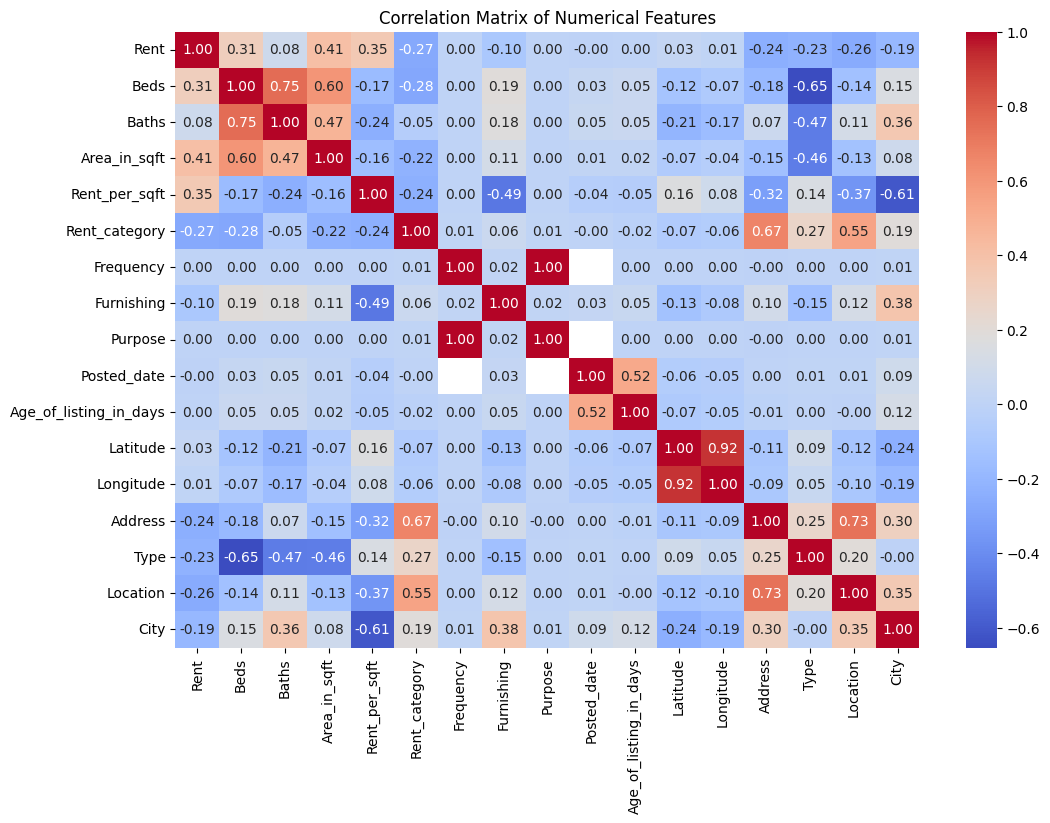

In [50]:
# Analyzing the correlation between numerical features and rent prices
numerical_data = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# processing data

#### delete null values

In [51]:
df.dropna(inplace=True)
print(df.isna().sum())

Rent                      0
Beds                      0
Baths                     0
Area_in_sqft              0
Rent_per_sqft             0
Rent_category             0
Frequency                 0
Furnishing                0
Purpose                   0
Posted_date               0
Age_of_listing_in_days    0
Latitude                  0
Longitude                 0
Address                   0
Type                      0
Location                  0
City                      0
dtype: int64


#### Encoding

In [56]:
obj_columns = df.select_dtypes(include=["object"]).columns
for col in obj_columns:
    uniques = df[col].unique()
    print(col, uniques)

In [53]:
columns_to_label_encoding = ["Rent_category", "Frequency", "Furnishing", "Purpose"]



columns_to_categorical_encoding = ["Address", "Type", "Location", "City"]

In [57]:
label_encoder = LabelEncoder()
for col in columns_to_label_encoding:
    df[col] = label_encoder.fit_transform(df[col])

In [58]:
for col in columns_to_label_encoding:
    print(col, df[col].unique())

Rent_category [2 0 1]
Frequency [0]
Furnishing [1 0]
Purpose [0]


In [59]:
df["Posted_date"] = pd.to_datetime(
    df["Posted_date"], format="%Y-%m-%d", errors="coerce"
).dt.day_of_year

In [60]:
df["Posted_date"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
73729   NaN
73734   NaN
73735   NaN
73737   NaN
73738   NaN
Name: Posted_date, Length: 73022, dtype: float64

***Categorical Ecoding*** *(Target encoder)*

In [61]:
encoder = ce.TargetEncoder(cols=columns_to_categorical_encoding)
df_encoded = encoder.fit_transform(
    df[columns_to_categorical_encoding], df["Rent_category"]
)

df = pd.concat(
    [df.drop(columns=columns_to_categorical_encoding), df_encoded], axis=1
)

/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_do

In [62]:
df[columns_to_categorical_encoding]

,Address,Type,Location,City
0,1.657878,1.124840,1.542257,1.129017
1,1.492669,1.124840,0.676570,1.129017
2,1.562104,1.124840,1.183177,1.129017
3,1.233036,0.345865,1.542257,1.129017
4,0.026813,0.664384,0.676570,1.129017
...,...,...,...,...
73729,1.248673,1.124840,1.061590,1.026553
73734,1.333333,0.664384,1.036977,1.026553
73735,1.000000,1.124840,1.083110,1.026553
73737,1.000000,1.124840,1.061590,1.026553


## Handling Outilers

#### Handling outliers in 1st column

In [63]:
print(df.columns[0])

Rent


<Axes: >

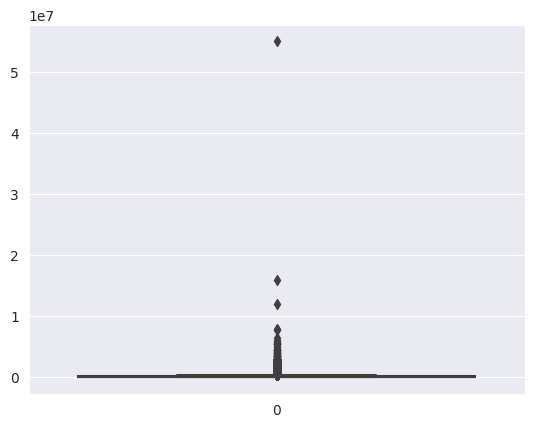

In [65]:
sns.set_style("darkgrid")
sns.boxplot(data=df["Rent"])

In [67]:
num_rent_outiers = (df["Rent"] > 1e7).sum()
print(num_rent_outiers)

3


In [68]:
rent_mean = df["Rent"].mean()
print(rent_mean)
print(df["Rent"].min(), df["Rent"].max())

148373.41512147023
0 55000000


In [69]:
df["Rent"].loc[df["Rent"] > 1e7] = 1e7

/tmp/ipykernel_33/3318389314.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/tmp/ipykernel_33/3318389314.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [70]:
# check outliers again
num_rent_outiers = (df["Rent"] > 1e7).sum()
print(num_rent_outiers)

0


***Handling outliers in 2nd column***

In [71]:
print(df.columns[1])

Beds


<Axes: >

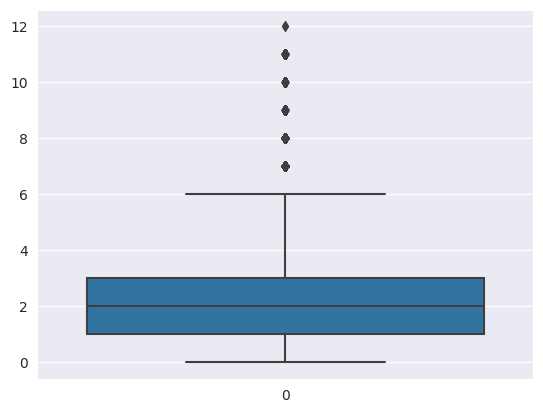

In [72]:
sns.boxplot(data=df["Beds"])

In [73]:
print(df["Beds"].min(), df["Beds"].max())

0 12


***Handling outliers in 3rd column***

In [74]:
print(df.columns[2])

Baths


<Axes: >

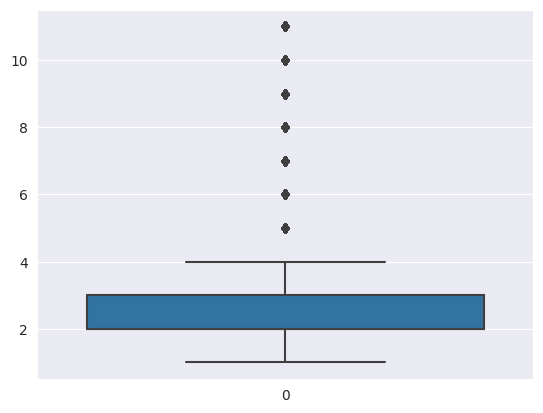

In [75]:
sns.boxplot(data=df["Baths"])

In [76]:
num_baths_outiers = (df["Baths"] > 10).sum()
print(num_baths_outiers)

201


In [77]:
print((df["Baths"]).max())

11


***Handling outliers in 4th column***

In [78]:
print(df.columns[3])

Area_in_sqft


<Axes: >

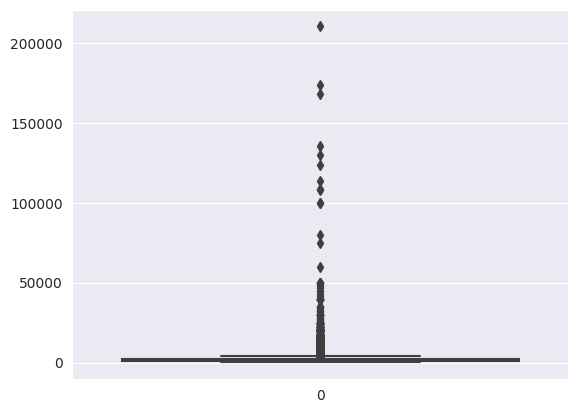

In [79]:
sns.boxplot(data=df["Area_in_sqft"])

In [80]:
area_mean = (df["Area_in_sqft"]).mean()
print(area_mean)

2035.651488592479


In [81]:
num_area_outiers = (df["Area_in_sqft"] > 10000).sum()
print(num_area_outiers)

1171


In [82]:
(df["Area_in_sqft"]).max()

210254

In [83]:
df["Area_in_sqft"].loc[df["Area_in_sqft"] > 10000] = 10000

/tmp/ipykernel_33/647713150.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/tmp/ipykernel_33/647713150.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

In [84]:
# check outliers again
num_outiers = (df["Area_in_sqft"] > 10000).sum()
print(num_outiers)

0


***Handling outliers in 5th column***

Rent_per_sqft
1154
0


/tmp/ipykernel_33/2318719160.py:8: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/tmp/ipykernel_33/2318719160.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

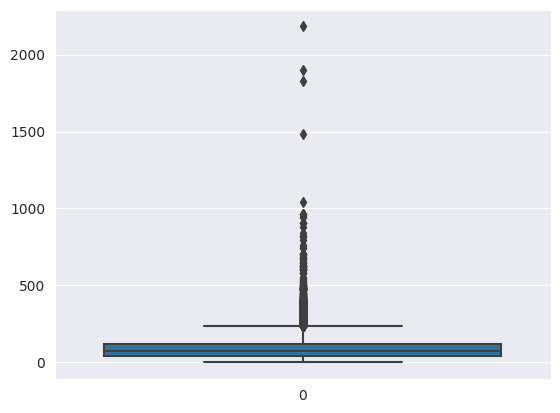

In [85]:
print(df.columns[4])

sns.boxplot(data=df["Rent_per_sqft"])

num_rent_sqft_outliears = (df["Rent_per_sqft"] > 280).sum()
print(num_rent_sqft_outliears)

df["Rent_per_sqft"].loc[df["Rent_per_sqft"] > 280] = 280

# check num outliers again
num_rent_sqft_outliears = (df["Rent_per_sqft"] > 280).sum()
print(num_rent_sqft_outliears)

***Handling outliers in 6th column***

Rent_category


<Axes: >

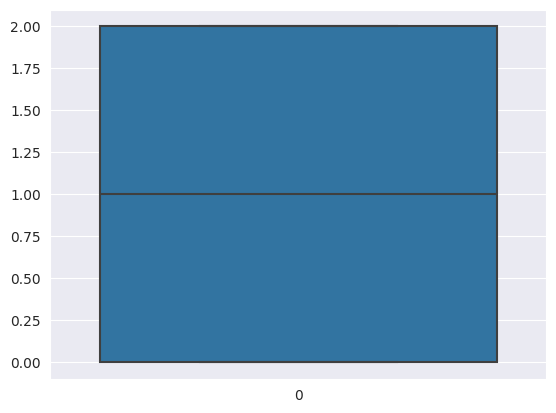

In [86]:
print(df.columns[5])

sns.boxplot(data=df["Rent_category"])

***Handling outliers in 7th column***

Frequency
0 0


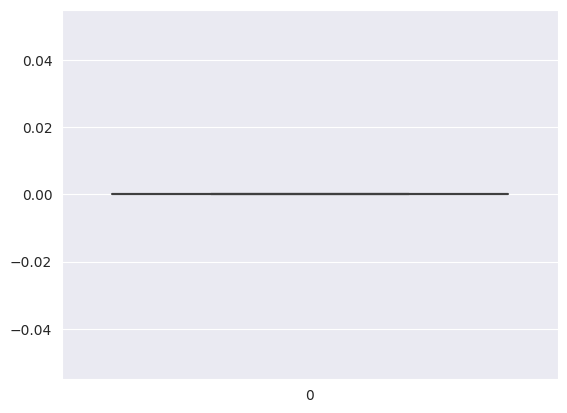

In [87]:
print(df.columns[6])

sns.boxplot(data=df["Frequency"])

print(
    df["Frequency"].max(),
    df["Frequency"].min(),
)

***Handling outliers in 8th column***

Furnishing


<Axes: >

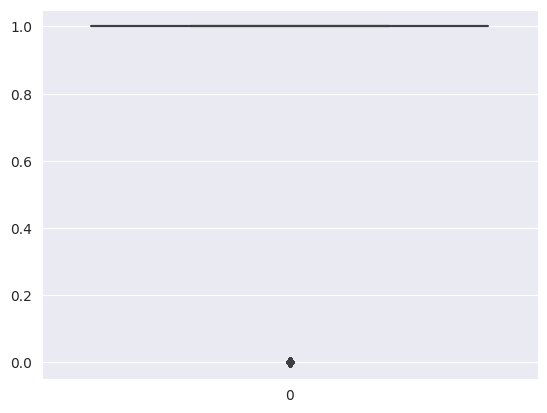

In [88]:
print(df.columns[7])

sns.boxplot(data=df["Furnishing"])

***Handling outliers in 9th column***

Purpose


<Axes: >

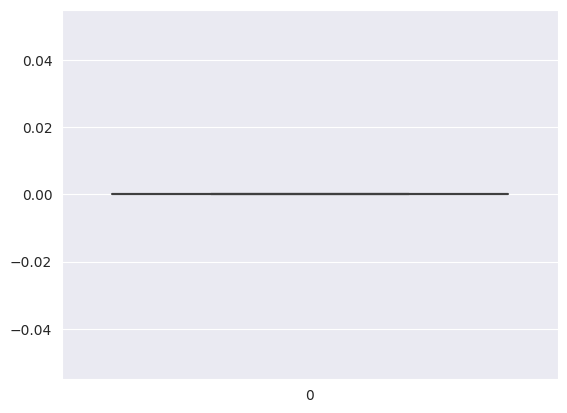

In [89]:
print(df.columns[8])

sns.boxplot(data=df["Purpose"])

***Handling outliers in 10th column***

Posted_date
nan nan
0
nan
0


/tmp/ipykernel_33/3859899349.py:12: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/tmp/ipykernel_33/3859899349.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

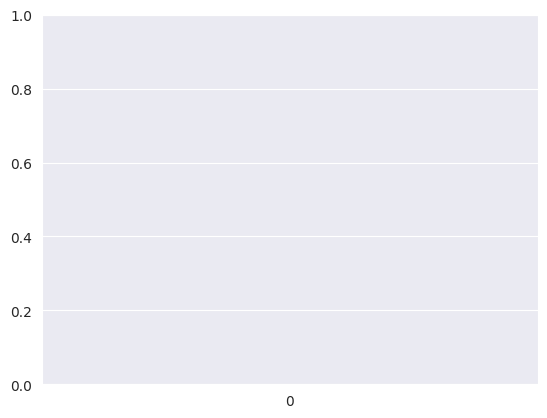

In [90]:
print(df.columns[9])

sns.boxplot(data=df["Posted_date"])

print(df["Posted_date"].min(), df["Posted_date"].max())
num_date_outlin = (df["Posted_date"] > 300).sum()
print(num_date_outlin)

date_mean = df["Posted_date"].mean()
print(date_mean)

df["Posted_date"].loc[df["Posted_date"] > 300] = date_mean

print((df["Posted_date"] > 300).sum())

***Handling outliers in 11th column***

Age_of_listing_in_days
11 2276
3314
73.88524006463805
0


/tmp/ipykernel_33/228952655.py:12: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/tmp/ipykernel_33/228952655.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

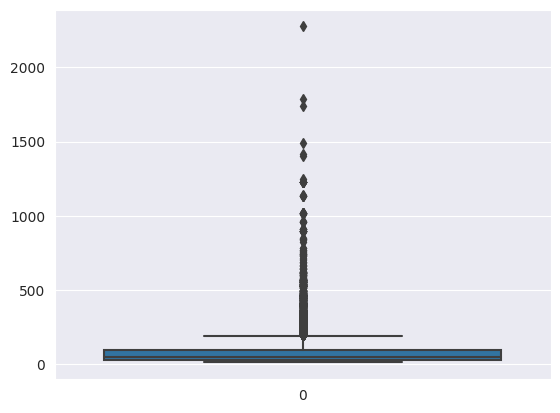

In [91]:
print(df.columns[10])

sns.boxplot(data=df["Age_of_listing_in_days"])

print(df["Age_of_listing_in_days"].min(), df["Age_of_listing_in_days"].max())
num_age_outlier = (df["Age_of_listing_in_days"] > 200).sum()
print(num_age_outlier)

age_mean = df["Age_of_listing_in_days"].mean()
print(age_mean)

df["Age_of_listing_in_days"].loc[df["Age_of_listing_in_days"] > 200] = 200

print((df["Age_of_listing_in_days"] > 200).sum())

***Handling outliers in 12th column***

Latitude
15.175847 25.9203098


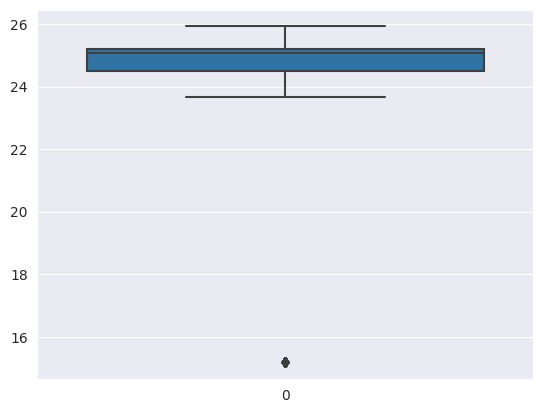

In [92]:
print(df.columns[11])

sns.boxplot(data=df["Latitude"])

print(df["Latitude"].min(), df["Latitude"].max())

***Handling outliers in 13th column***

Longitude
43.351928 56.36129352186721


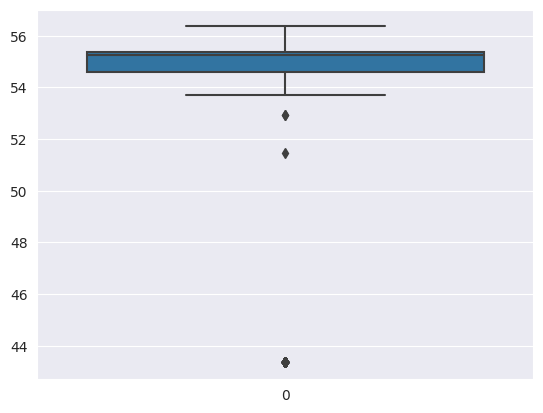

In [93]:
print(df.columns[12])

sns.boxplot(data=df["Longitude"])

print(df["Longitude"].min(), df["Longitude"].max())

***Handling outliers in 14th column***

Address
1.0023417903355358
65145
65145


/tmp/ipykernel_33/1946838443.py:11: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/tmp/ipykernel_33/1946838443.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

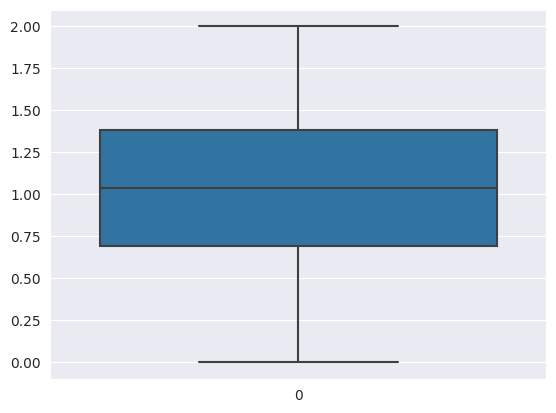

In [95]:
print(df.columns[13])

sns.boxplot(data=df["Address"])

address_mean = df["Address"].mean()
print(address_mean)

num_outiers = (df["Address"] > 2.5).sum() + (df["Address"] < 1.7).sum()
print(num_outiers)

df["Address"].loc[df["Address"] > 2.5] = address_mean
df["Address"].loc[df["Address"] < 1.7] = address_mean

# check outliers again
num_outiers = (df["Address"] > 2.5).sum() + (df["Address"] < 1.7).sum()
print(num_outiers)

***Handling outliers in 15th column***

Type
0.12552209702021486 1.1248397207579428


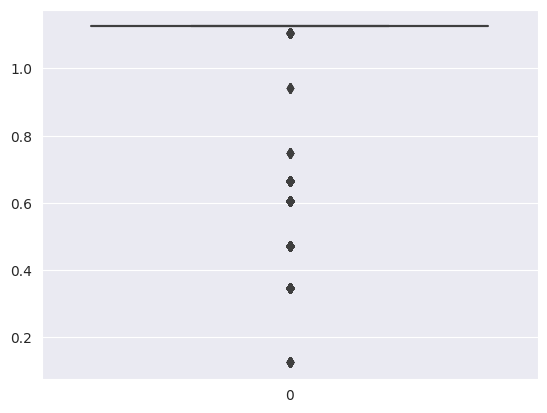

In [96]:
print(df.columns[14])

sns.boxplot(data=df["Type"])

print(df["Type"].min(), df["Type"].max())

***Handling outliers in 16th column***

Location
5.1372844806339894e-11 1.9594095940839868


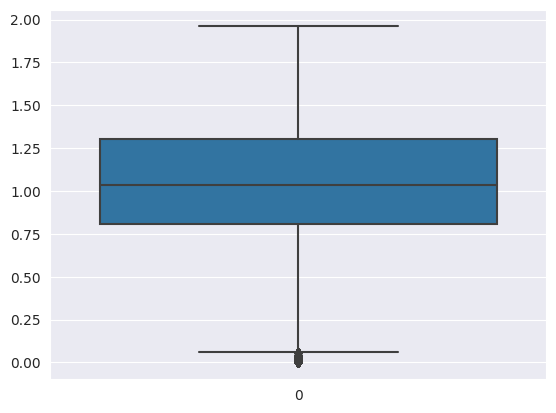

In [97]:
print(df.columns[15])

sns.boxplot(data=df["Location"])

print(df["Location"].min(), df["Location"].max())

***Handling outliers in 17th column***

City
0.8481253105000146 1.315038893690579


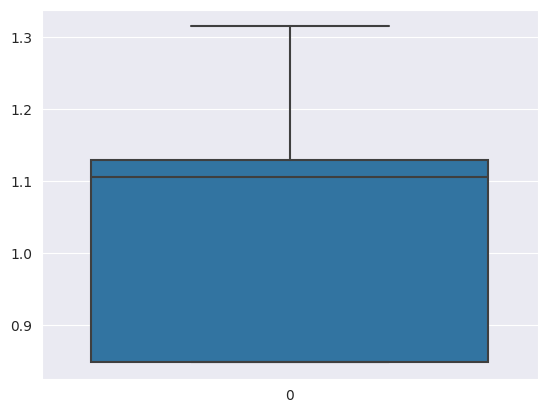

In [98]:
print(df.columns[16])

sns.boxplot(data=df["City"])

print(df["City"].min(), df["City"].max())

### ***Scaling***

In [99]:
print(df.columns)

Index(['Rent', 'Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft',
       'Rent_category', 'Frequency', 'Furnishing', 'Purpose', 'Posted_date',
       'Age_of_listing_in_days', 'Latitude', 'Longitude', 'Address', 'Type',
       'Location', 'City'],
      dtype='object')


In [100]:
colums_to_scaling = [
    "Beds",
    "Baths",
    "Area_in_sqft",
    "Rent_per_sqft",
    "Furnishing",
    "Posted_date",
    "Age_of_listing_in_days",
    "Latitude",
    "Longitude",
    "Address",
]

In [103]:
scaler = MinMaxScaler(feature_range=(1, 2))
scaler.fit(df[colums_to_scaling])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning:

All-NaN slice encountered

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning:

All-NaN slice encountered



MinMaxScaler(feature_range=(1, 2))

In [104]:
scaler.fit_transform(df[colums_to_scaling])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning:

All-NaN slice encountered

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning:

All-NaN slice encountered



array([[1.25      , 1.3       , 1.17237558, ..., 1.86721426, 1.84984256,
        1.        ],
       [1.25      , 1.3       , 1.13580496, ..., 1.86725372, 1.8651801 ,
        1.        ],
       [1.16666667, 1.2       , 1.12492444, ..., 1.86650065, 1.86468562,
        1.        ],
       ...,
       [1.16666667, 1.1       , 1.09329035, ..., 1.96348344, 1.94198285,
        1.        ],
       [1.        , 1.        , 1.0347572 , ..., 1.96026806, 1.93963585,
        1.        ],
       [1.        , 1.        , 1.04291759, ..., 1.96348344, 1.94198285,
        1.        ]])

In [105]:
df[colums_to_scaling] = scaler.transform(df[colums_to_scaling])

In [106]:
df[colums_to_scaling]

,Beds,Baths,Area_in_sqft,Rent_per_sqft,Furnishing,Posted_date,Age_of_listing_in_days,Latitude,Longitude,Address
0,1.250000,1.3,1.172376,1.248099,2.0,NaN,1.179894,1.867214,1.849843,1.0
1,1.250000,1.3,1.135805,1.351617,2.0,NaN,1.174603,1.867254,1.865180,1.0
2,1.166667,1.2,1.124924,1.269080,1.0,NaN,1.105820,1.866501,1.864686,1.0
3,1.250000,1.3,1.379710,1.204453,2.0,NaN,1.243386,1.867214,1.849843,1.0
4,1.416667,1.6,1.683659,1.182216,2.0,NaN,1.285714,1.867254,1.865180,1.0
...,...,...,...,...,...,...,...,...,...,...
73729,1.000000,1.0,1.017630,1.143431,2.0,NaN,1.650794,1.960268,1.939636,1.0
73734,1.083333,1.0,1.042918,1.178571,2.0,NaN,1.693122,1.961948,1.939852,1.0
73735,1.166667,1.1,1.093290,1.078571,2.0,NaN,1.079365,1.963483,1.941983,1.0
73737,1.000000,1.0,1.034757,1.119332,2.0,NaN,1.624339,1.960268,1.939636,1.0


In [107]:
df

,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Latitude,Longitude,Address,Type,Location,City
0,124000,1.250000,1.3,1.172376,1.248099,2,0,2.0,0,NaN,1.179894,1.867214,1.849843,1.0,1.124840,1.542257,1.129017
1,140000,1.250000,1.3,1.135805,1.351617,2,0,2.0,0,NaN,1.174603,1.867254,1.865180,1.0,1.124840,0.676570,1.129017
2,99000,1.166667,1.2,1.124924,1.269080,2,0,1.0,0,NaN,1.105820,1.866501,1.864686,1.0,1.124840,1.183177,1.129017
3,220000,1.250000,1.3,1.379710,1.204453,0,0,2.0,0,NaN,1.243386,1.867214,1.849843,1.0,0.345865,1.542257,1.129017
4,350000,1.416667,1.6,1.683659,1.182216,0,0,2.0,0,NaN,1.285714,1.867254,1.865180,1.0,0.664384,0.676570,1.129017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73729,10000,1.000000,1.0,1.017630,1.143431,1,0,2.0,0,NaN,1.650794,1.960268,1.939636,1.0,1.124840,1.061590,1.026553
73734,25000,1.083333,1.0,1.042918,1.178571,1,0,2.0,0,NaN,1.693122,1.961948,1.939852,1.0,0.664384,1.036977,1.026553
73735,22000,1.166667,1.1,1.093290,1.078571,1,0,2.0,0,NaN,1.079365,1.963483,1.941983,1.0,1.124840,1.083110,1.026553
73737,14000,1.000000,1.0,1.034757,1.119332,1,0,2.0,0,NaN,1.624339,1.960268,1.939636,1.0,1.124840,1.061590,1.026553
